In [1]:
import pandas as pd

In [2]:
##WE now load our car sales data
car_sales_data = pd.read_csv('car_data.csv')

In [3]:
##Let us now display our first few rows to see how our data frame is structured

In [4]:
car_sales_data.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [5]:
##Now let us try and clean our data by first clearing null values
print(car_sales_data.isnull().sum())

Car_id           0
Date             0
Customer Name    1
Gender           0
Annual Income    0
Dealer_Name      0
Company          0
Model            0
Engine           0
Transmission     0
Color            0
Price ($)        0
Dealer_No        0
Body Style       0
Phone            0
Dealer_Region    0
dtype: int64


In [6]:
# Data cleaning (if necessary)
# For example, converting Date to datetime format
##car_sales_data['Date'] = pd.to_datetime(car_sales_data['Date'], format='%d/%m/%Y')

In [7]:
# Check the data types and convert if necessary
print(car_sales_data.dtypes)

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
!pip install seaborn


In [10]:
pip install --upgrade seaborn


Note: you may need to restart the kernel to use updated packages.


In [11]:
import seaborn as sns

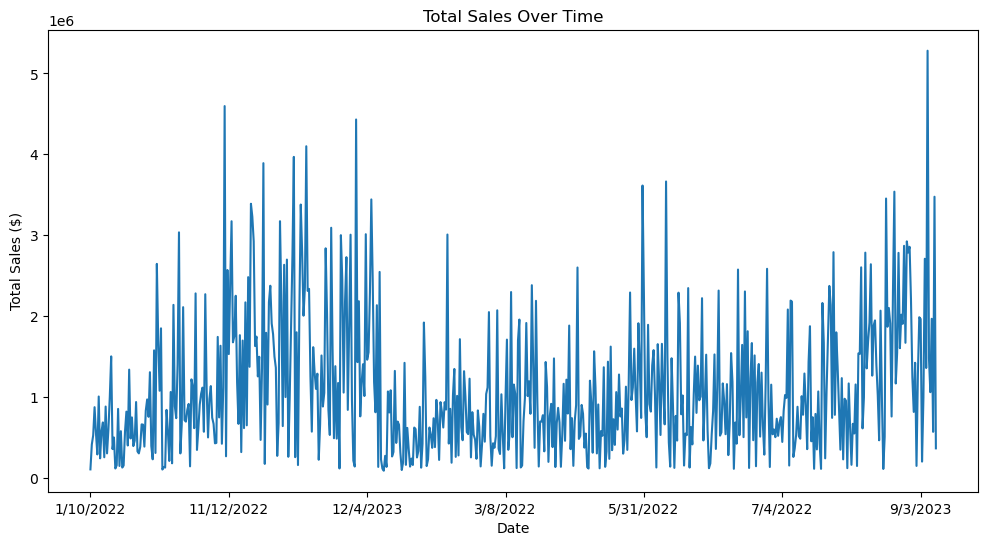

In [12]:
# Plot sales over time
plt.figure(figsize=(12, 6))
car_sales_data.groupby('Date')['Price ($)'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.show()

In [13]:
##Note from here we see that our highest sales date was 9/3/2023 

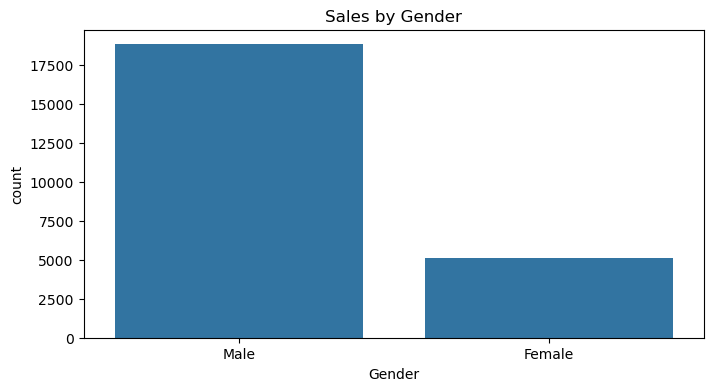

In [14]:
# Sales by Gender
plt.figure(figsize=(8, 4))
sns.countplot(data=car_sales_data, x='Gender')
plt.title('Sales by Gender')
plt.show()

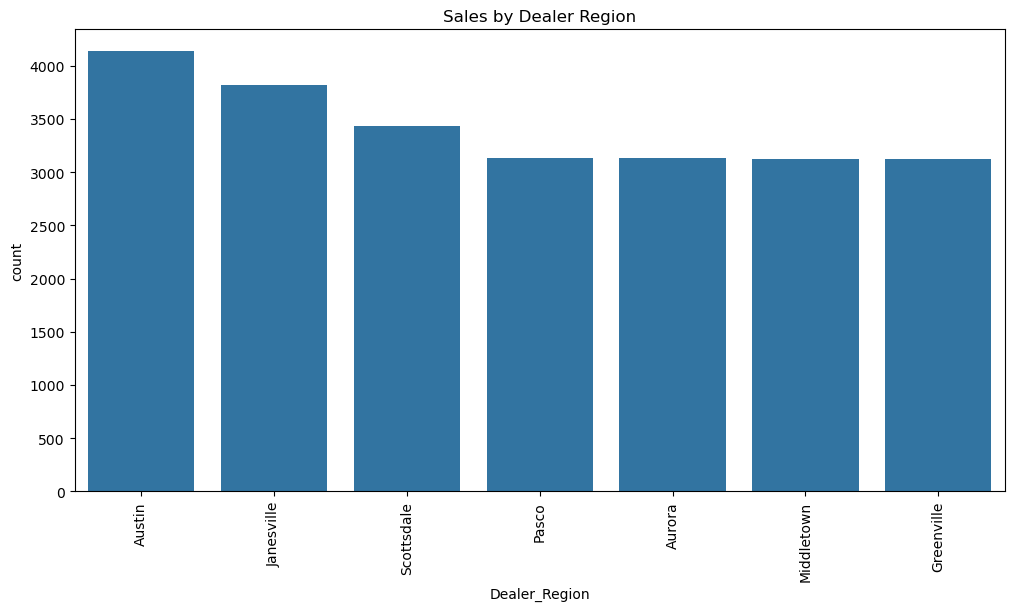

In [15]:
# Sales by Dealer Region
plt.figure(figsize=(12, 6))
sns.countplot(data=car_sales_data, x='Dealer_Region', order=car_sales_data['Dealer_Region'].value_counts().index)
plt.title('Sales by Dealer Region')
plt.xticks(rotation=90)
plt.show()

In [16]:
##here we can see that Austin is the dealer that had the highest sales, and Pasco, Aurora, Middletown and Greenville has the least sales

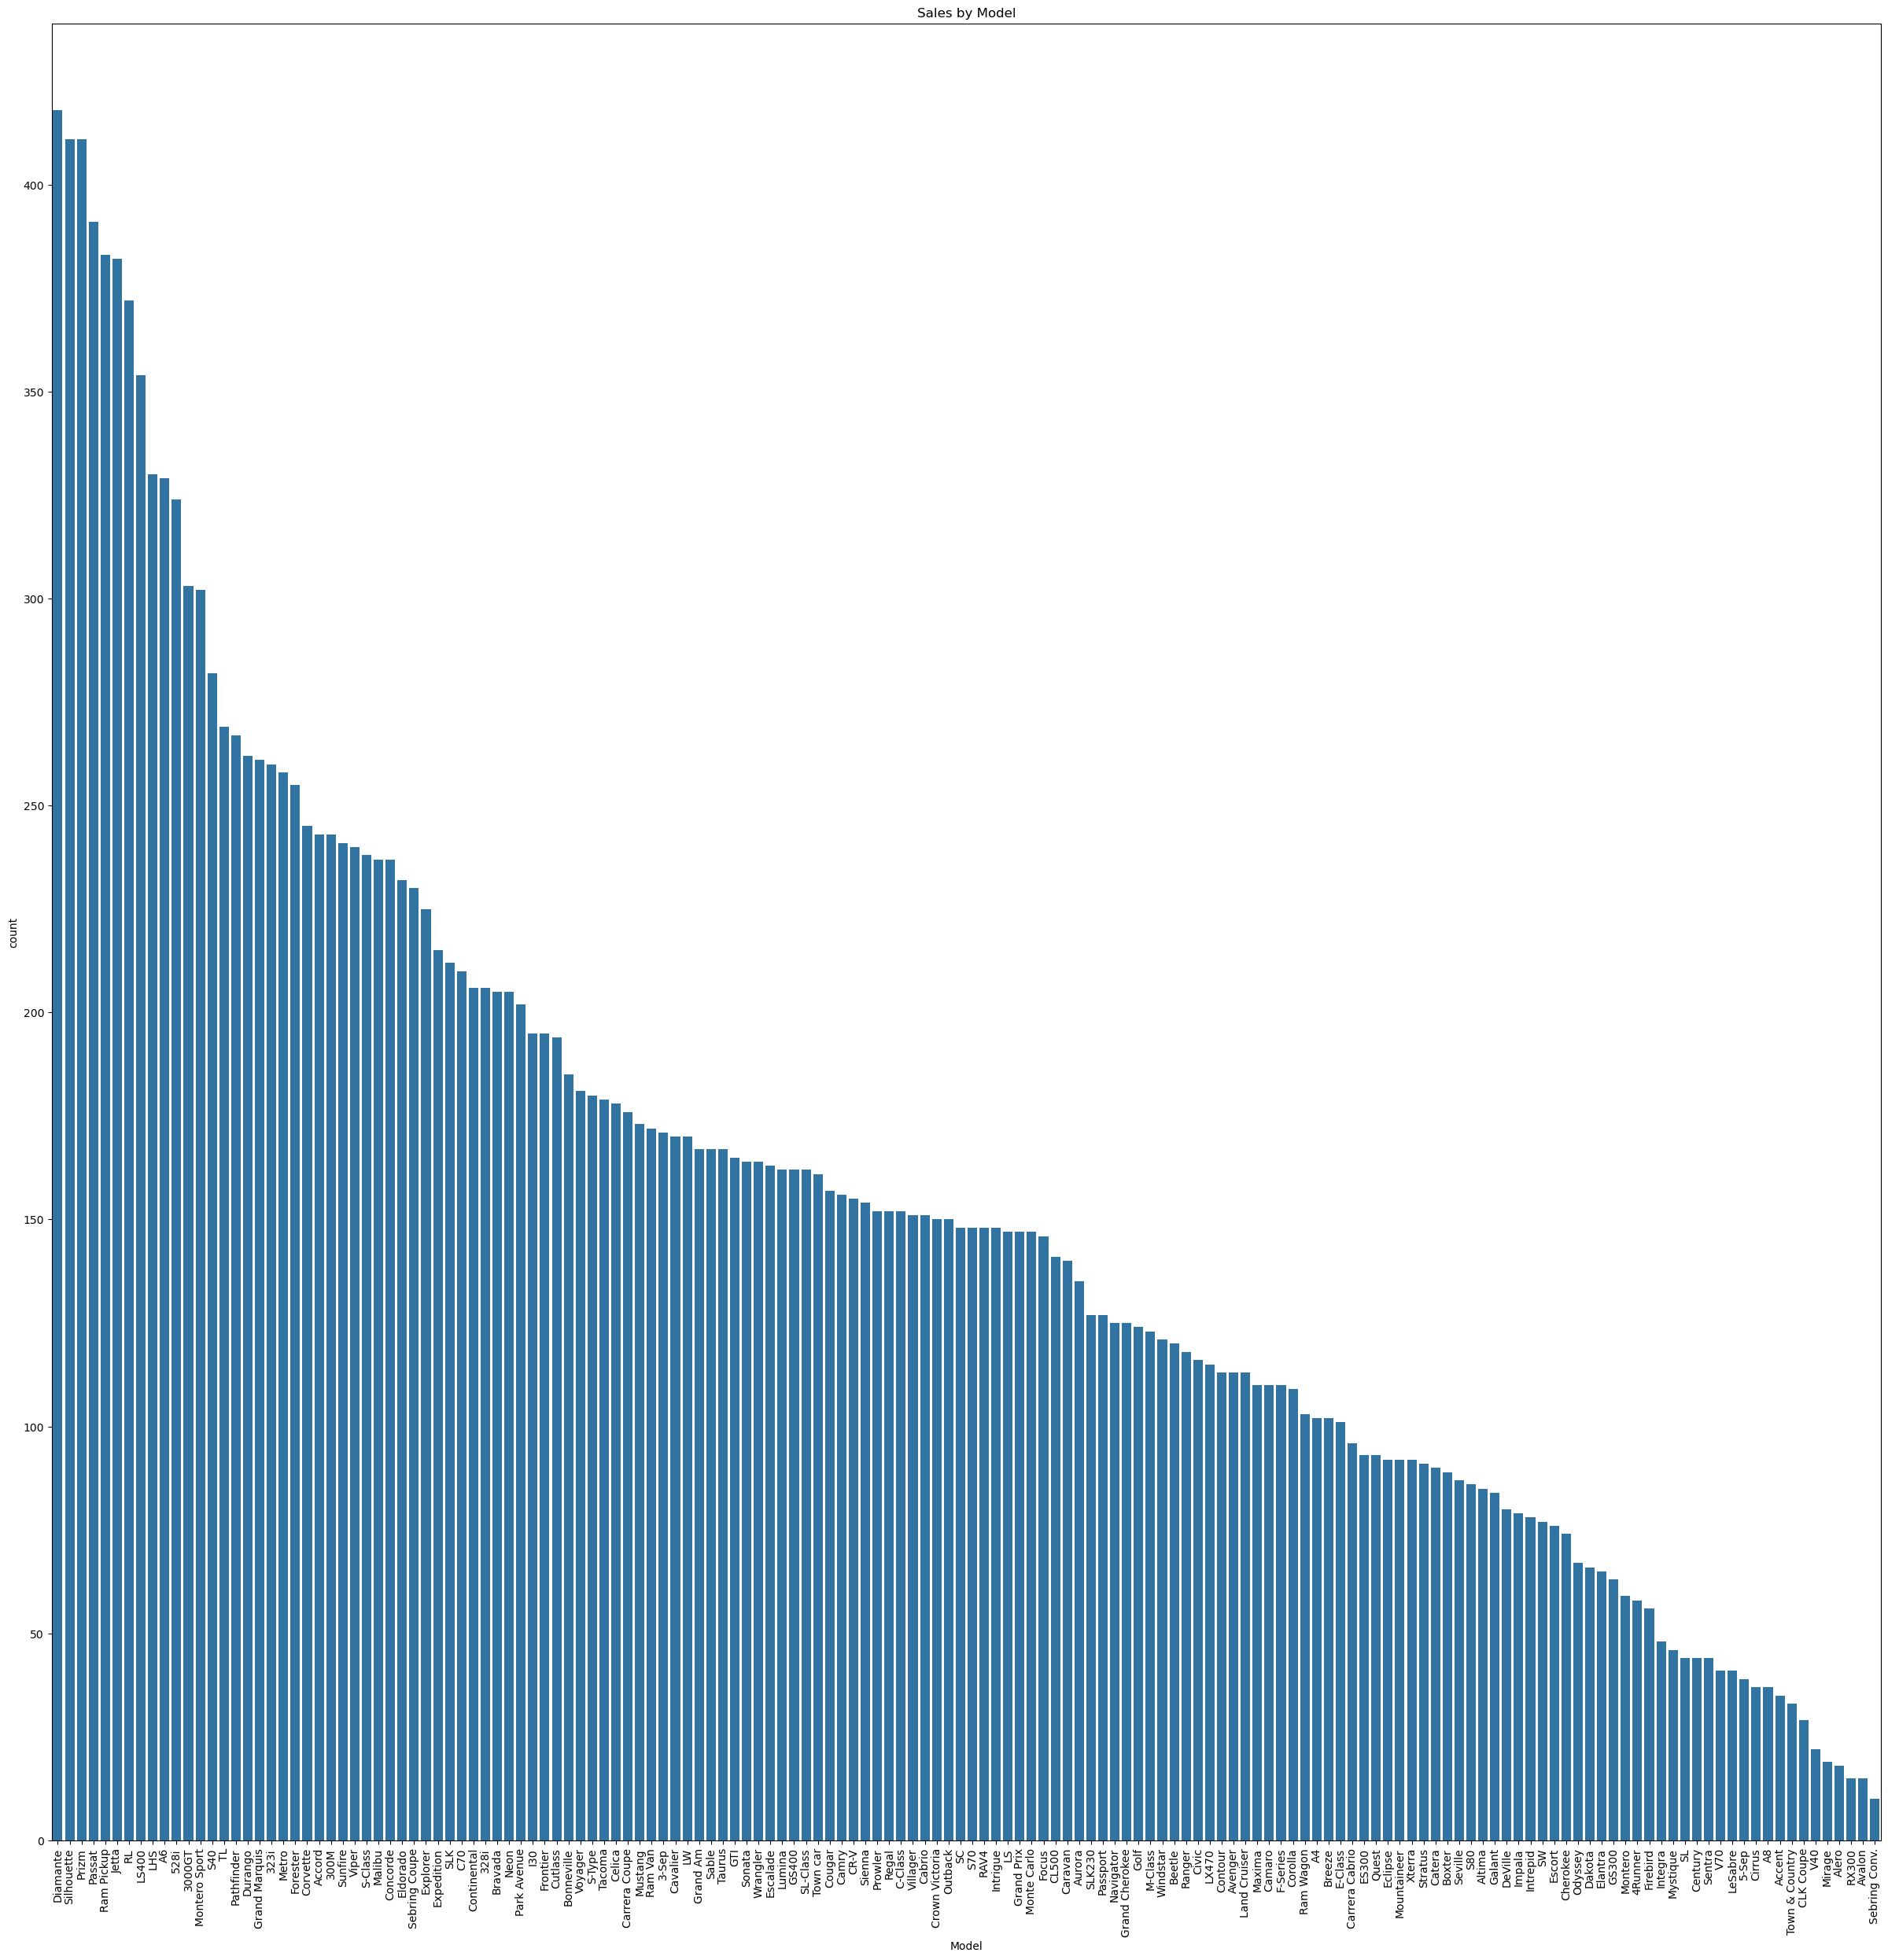

In [17]:
# Sales by Model
plt.figure(figsize=(30, 30))
sns.countplot(data=car_sales_data, x='Model', order=car_sales_data['Model'].value_counts().index)
plt.title('Sales by Model')
plt.xticks(rotation=90)
plt.show()

In [18]:
##From this we can see that Diamante had the highest number of sales

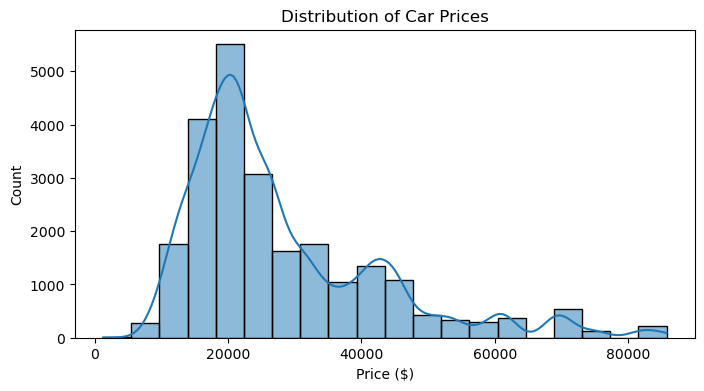

In [19]:
# Distribution of Prices
plt.figure(figsize=(8, 4))
sns.histplot(car_sales_data['Price ($)'], bins=20, kde=True)
plt.title('Distribution of Car Prices')
plt.show()

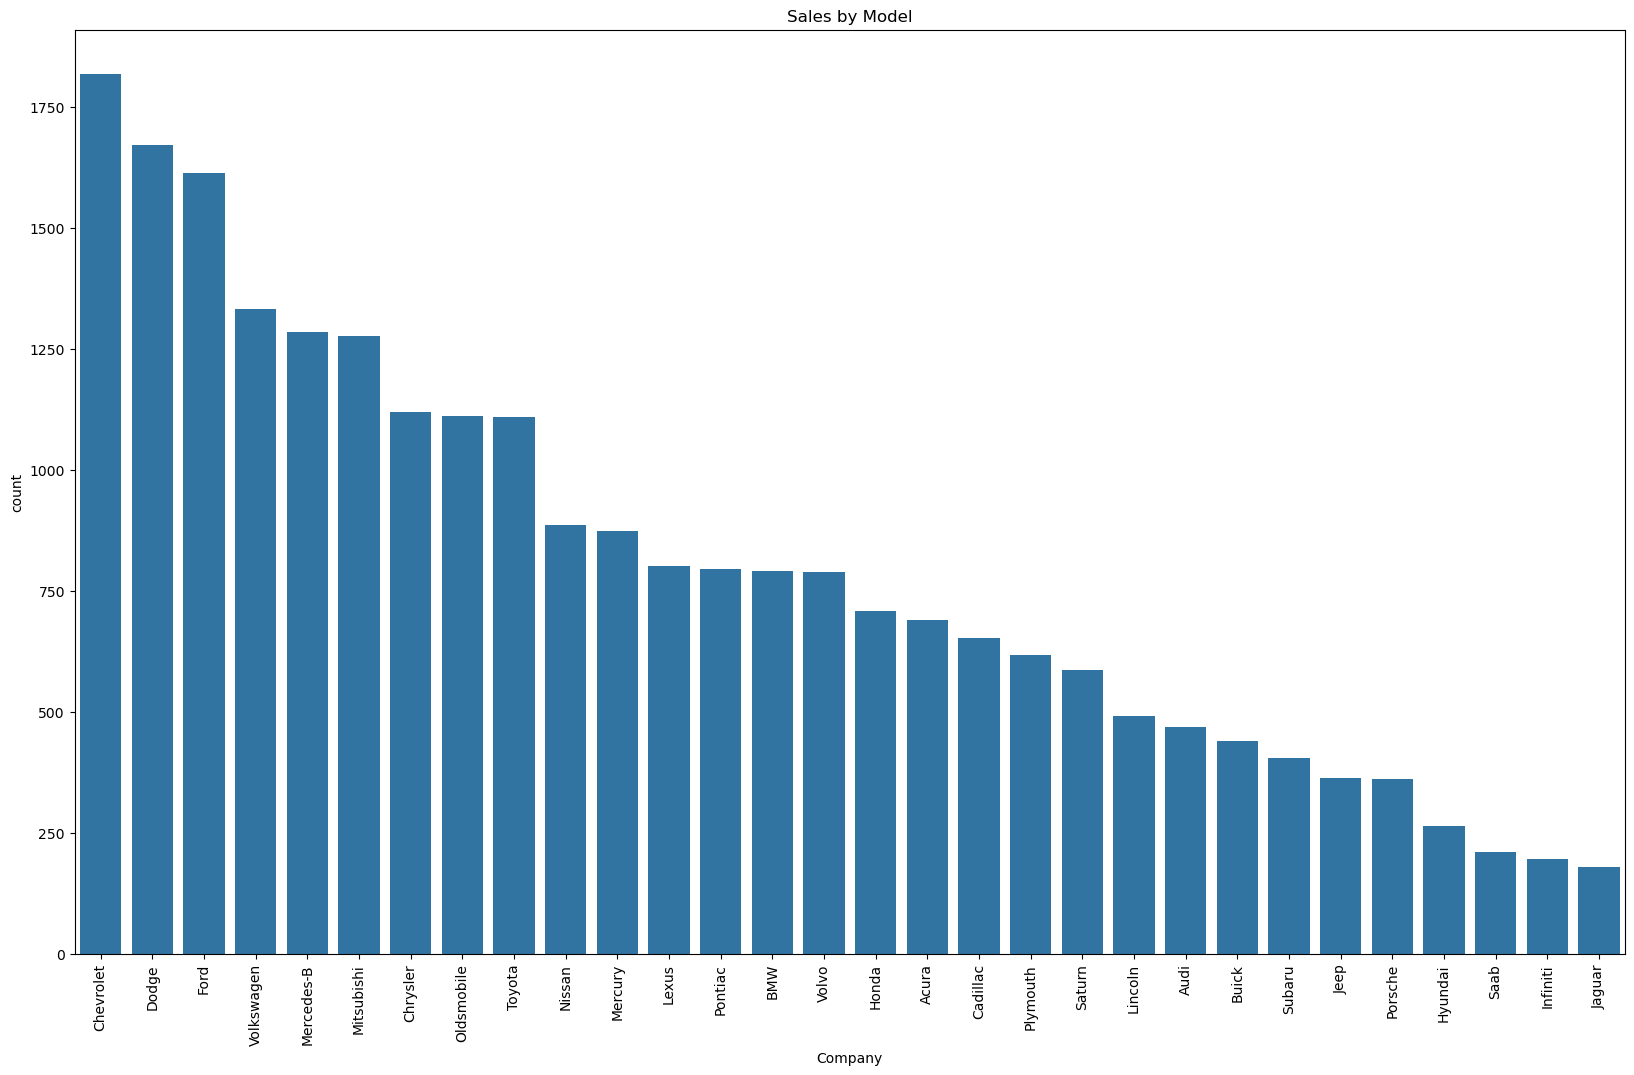

In [20]:
# Sales by Model
plt.figure(figsize=(20, 12))
sns.countplot(data=car_sales_data, x='Company', order=car_sales_data['Company'].value_counts().index)
plt.title('Sales by Model')
plt.xticks(rotation=90)
plt.show()

In [21]:
##Now we will do some Feauture Enginnering

In [22]:
#We will now try and extract the year and month from the date
car_sales_data['Year'] = car_sales_data['Date'].dt.year
car_sales_data['Month'] = car_sales_data['Date'].dt.month

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
##we had not converted our dates to dateTime, let us do that now

In [ ]:
# Data cleaning 
car_sales_data['Date'] = pd.to_datetime(car_sales_data['Date'], format='%d/%m/%Y')

In [23]:
##our date time data is in object format, Directly convert the entire column to datetime, specifying the format if consistent, or using infer_datetime_format if they are in mixed formats.

In [24]:
car_sales_data['Date'] = pd.to_datetime(car_sales_data['Date']) ##Our format was simply wrong lol

In [25]:
#We will now try and extract the year and month from the date again
car_sales_data['Year'] = car_sales_data['Date'].dt.year
car_sales_data['Month'] = car_sales_data['Date'].dt.month

In [26]:
# We will now check the data types and convert if necessary
print(car_sales_data.dtypes)

Car_id                   object
Date             datetime64[ns]
Customer Name            object
Gender                   object
Annual Income             int64
Dealer_Name              object
Company                  object
Model                    object
Engine                   object
Transmission             object
Color                    object
Price ($)                 int64
Dealer_No                object
Body Style               object
Phone                     int64
Dealer_Region            object
Year                      int32
Month                     int32
dtype: object


In [27]:
# Calculate the total sales for each month
monthly_sales = car_sales_data.groupby(['Year', 'Month'])['Price ($)'].sum().reset_index()


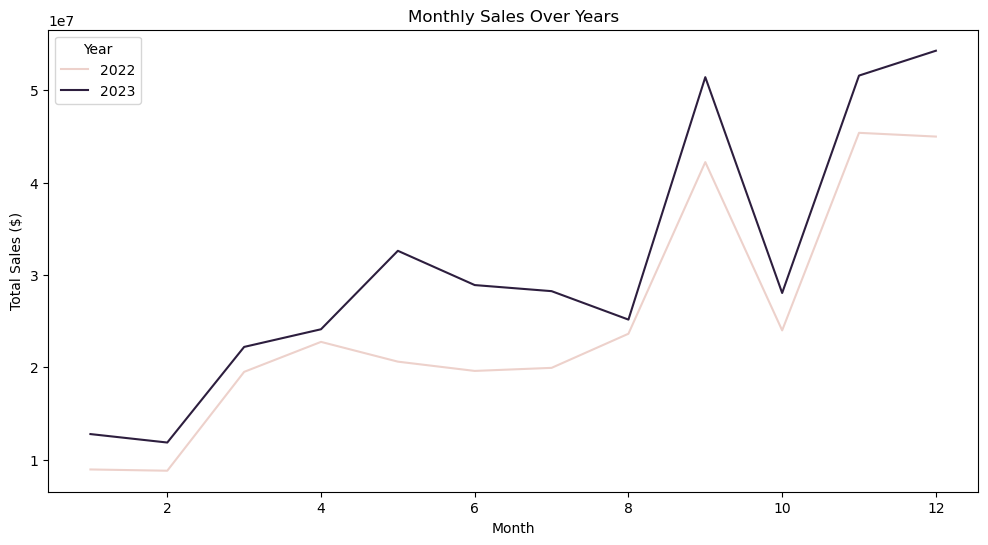

In [28]:
# Visualize monthly sales
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Price ($)', hue='Year')
plt.title('Monthly Sales Over Years')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.show()

In [29]:
##From this plot, we can see that February in both 2022, and 2023 had the lowest amount of monthly sales, (INVESTIGATE WHY!!)
## whereas the highest monthly sales in 2023 were in December and November (INVESTIGATE WHY!!)
##We also note that there was a huge rise in sales from August till September and then a drop in october, in both years(INVESTIGATE WHY!!)

In [30]:
##Predictive Modelling

In [31]:
##We will build a predictive model to forecast future sales. 
## We can use time series forecasting models like ARIMA or machine learning models like Random Forest.

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [33]:
# We will now prepare the data for modeling
# Here, we use the monthly sales data
X = monthly_sales[['Year', 'Month']]
y = monthly_sales['Price ($)']

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
##And now for the best part, we get to make our ML predictions

In [37]:
y_pred = model.predict(X_test)

In [38]:
# Evaluate our model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 4149239.346


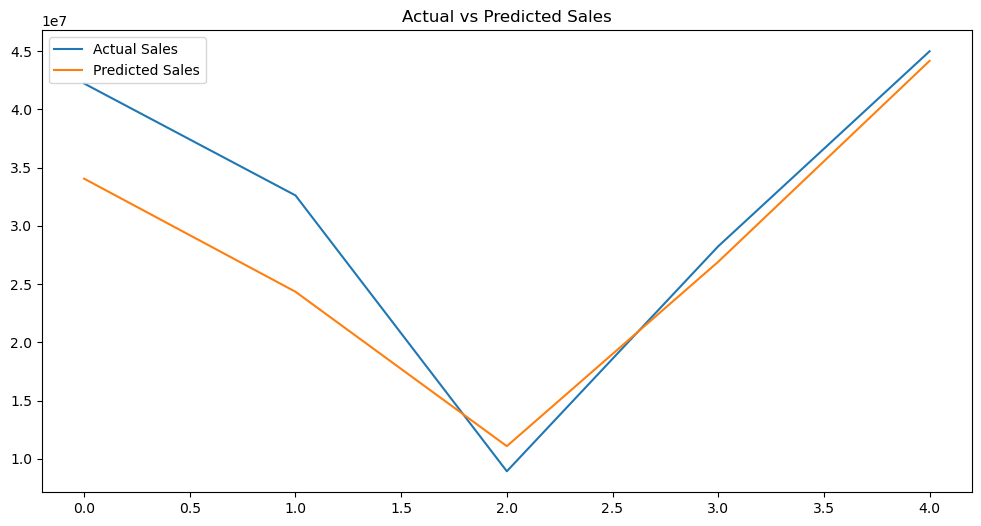

In [39]:
# Visualize the predictions vs actual sales
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.show()

In [40]:
## Great, we see that our model makes accurate predictions, 
## now lets actually conceptualize our predictions for future sales in such a way that we can present it

In [41]:
## First, we need to create a DataFrame for the future dates we want to predict.
# Create a DataFrame for future dates (2024 and 2025)
future_years = [2024, 2025]
future_months = list(range(1, 13))  # Months from January to December

In [42]:
future_dates = pd.DataFrame([(year, month) for year in future_years for month in future_months], columns=['Year', 'Month'])
print(future_dates) ##Great our dataFrame looks goood

    Year  Month
0   2024      1
1   2024      2
2   2024      3
3   2024      4
4   2024      5
5   2024      6
6   2024      7
7   2024      8
8   2024      9
9   2024     10
10  2024     11
11  2024     12
12  2025      1
13  2025      2
14  2025      3
15  2025      4
16  2025      5
17  2025      6
18  2025      7
19  2025      8
20  2025      9
21  2025     10
22  2025     11
23  2025     12


In [43]:
## Next, we use the trained model to predict sales for these future dates.
# Make predictions for future dates
future_sales_predictions = model.predict(future_dates)

In [44]:
# Add the predictions to the future_dates DataFrame
future_dates['Predicted Sales ($)'] = future_sales_predictions

In [45]:
# Display the future sales predictions
print(future_dates)

    Year  Month  Predicted Sales ($)
0   2024      1          12824455.42
1   2024      2          12134532.36
2   2024      3          21506786.87
3   2024      4          23708320.76
4   2024      5          24341886.18
5   2024      6          26429950.34
6   2024      7          26915206.23
7   2024      8          27160719.18
8   2024      9          41500099.86
9   2024     10          35989742.06
10  2024     11          49695305.76
11  2024     12          52032356.66
12  2025      1          12824455.42
13  2025      2          12134532.36
14  2025      3          21506786.87
15  2025      4          23708320.76
16  2025      5          24341886.18
17  2025      6          26429950.34
18  2025      7          26915206.23
19  2025      8          27160719.18
20  2025      9          41500099.86
21  2025     10          35989742.06
22  2025     11          49695305.76
23  2025     12          52032356.66


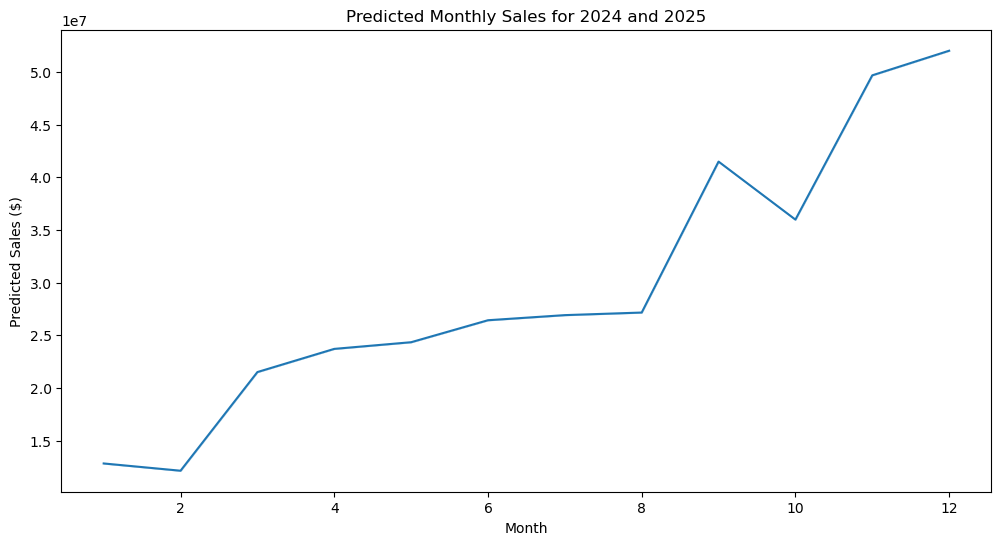

In [46]:
##Now We'll create a line plot to visualize the predicted sales for 2024 and 2025.
plt.figure(figsize=(12, 6))
sns.lineplot(data=future_dates, x='Month', y='Predicted Sales ($)', )
plt.title('Predicted Monthly Sales for 2024 and 2025')
plt.xlabel('Month')
plt.ylabel('Predicted Sales ($)')
plt.show()


In [47]:
##From this we can expect(After doing reaserch on the possible reasons for the 2022 and 2023 data) that February will be the month with 
##the lowest amount of sales whereas December will have the highest amount of sales with a steady rise in sales from March till August and
## an intsense rise from August till september following a drop in october and rises again from octobeer till December

In [48]:
##We weill also nopw create a table(TABULATE) to display the predicted future sales

In [49]:
# Create a pivot table for better visualization
pivot_table = future_dates.pivot(index='Month', columns='Year', values='Predicted Sales ($)')
print(pivot_table)

Year          2024         2025
Month                          
1      12824455.42  12824455.42
2      12134532.36  12134532.36
3      21506786.87  21506786.87
4      23708320.76  23708320.76
5      24341886.18  24341886.18
6      26429950.34  26429950.34
7      26915206.23  26915206.23
8      27160719.18  27160719.18
9      41500099.86  41500099.86
10     35989742.06  35989742.06
11     49695305.76  49695305.76
12     52032356.66  52032356.66


In [50]:
# Display the pivot table
import matplotlib.pyplot as plt
import matplotlib as mpl

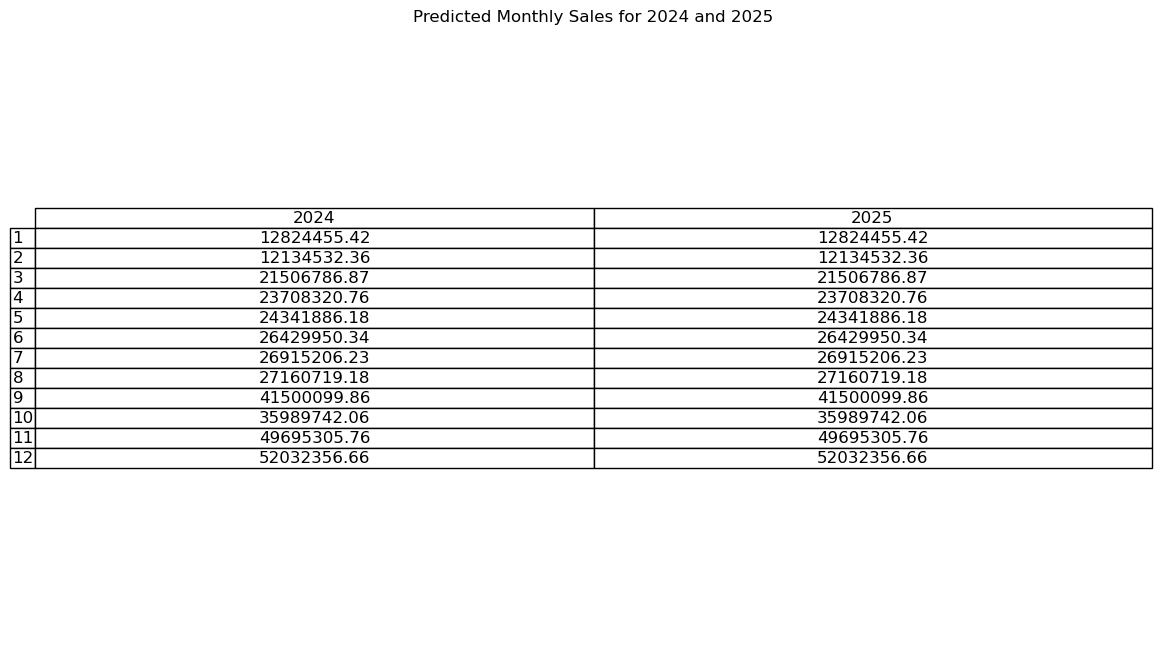

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')
table = mpl.table.table(ax, cellText=pivot_table.values, colLabels=pivot_table.columns, rowLabels=pivot_table.index, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)
plt.title('Predicted Monthly Sales for 2024 and 2025')
plt.show()

In [52]:
##Now well create MarkDowns to answer Business Specific Questions

1. Predictive Model Example:

The Random Forest model above is an example of a predictive model developed and implemented to forecast future sales based on historical data.

2. Gathering Business Intelligence:

We collected data from various sources, cleaned it, and performed exploratory data analysis to understand trends and patterns. For example, we identified that certain models are more popular, and certain regions have higher sales.

3. Reporting Performance:

Using visualizations, we reported key metrics such as total sales over time, sales by gender, dealer region, and model, helping management understand performance trends.

4. Identifying Markets:

By analyzing the sales by dealer region and model, we can identify potential markets for future campaigns or focus on improving sales of specific models.

5. Developing Methodologies:

We developed methodologies to improve data analysis, such as feature engineering (extracting year and month from the date) and using machine learning models for predictive analysis.

In [53]:
## Note also that the best time to buy a car would be in December